# Generate Histogram of images, apply Histogram Equalization and Histogram Matching on it

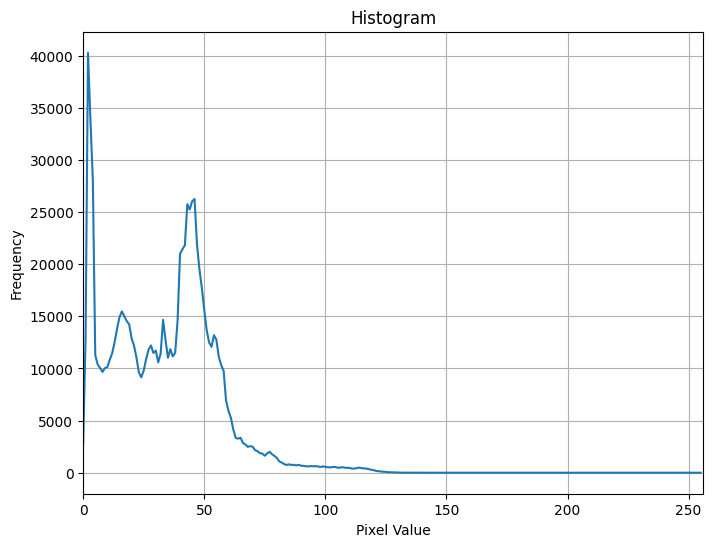

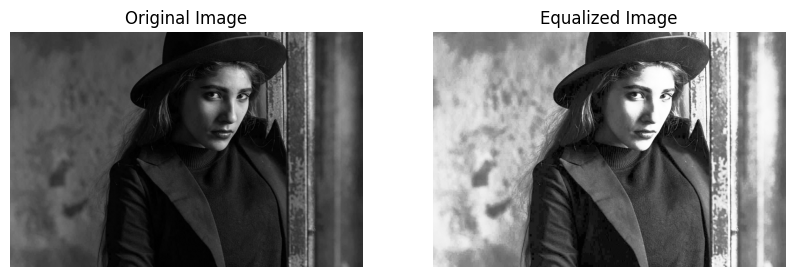

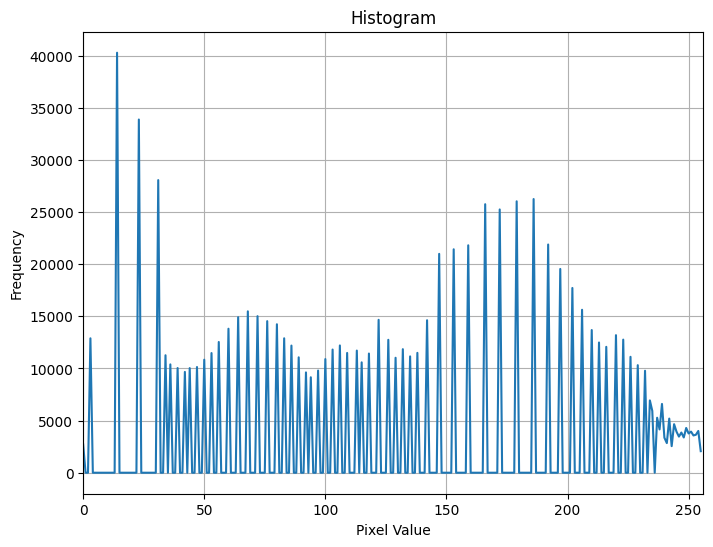

<Figure size 640x480 with 0 Axes>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = 'Images/exp2/underexposed_image.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Calculate the histogram
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.plot(histogram)
plt.xlim([0, 256])
plt.grid(True)
plt.show()
# Perform histogram equalization
equalized_image = cv2.equalizeHist(image)

# Display the original and equalized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')
# Calculate the histogram
histogram = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.plot(histogram)
plt.xlim([0, 256])
plt.grid(True)
plt.show()
plt.tight_layout()
plt.show()

# Open Ended Problem: Histogram matching

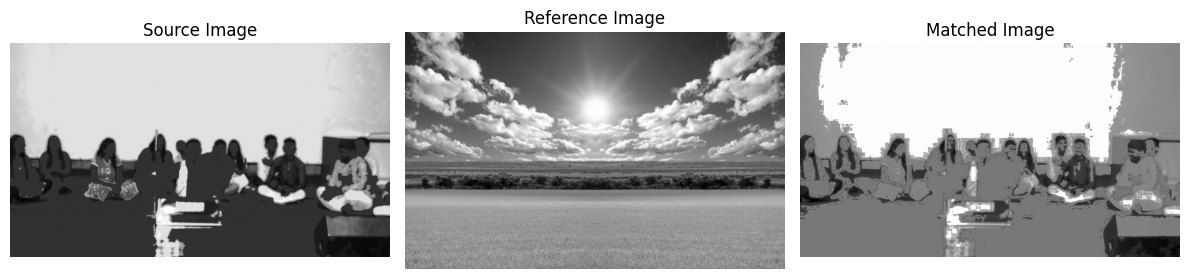

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the source and reference images
source_path = 'Images/exp2/source_image.png'        
reference_path = 'Images/exp2/reference_image.png'  
source_image = cv2.imread(source_path, cv2.IMREAD_GRAYSCALE)
reference_image = cv2.imread(reference_path, cv2.IMREAD_GRAYSCALE)

# Calculate histograms for the source and reference images
source_hist = cv2.calcHist([source_image], [0], None, [256], [0, 256])
reference_hist = cv2.calcHist([reference_image], [0], None, [256], [0, 256])

# Normalize histograms to have sum equal to 1
source_hist /= source_hist.sum()
reference_hist /= reference_hist.sum()

# Calculate cumulative distribution functions (CDF) for histograms
source_cdf = source_hist.cumsum()
reference_cdf = reference_hist.cumsum()

# Perform histogram matching by mapping source CDF to reference CDF
mapping = np.interp(source_cdf, reference_cdf, range(256))
matched_image = mapping[source_image]

# Convert to uint8 data type
matched_image = matched_image.astype(np.uint8)

# Display the images using Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.title('Source Image')
plt.imshow(source_image, cmap='gray')
plt.axis('off')

plt.subplot(132)
plt.title('Reference Image')
plt.imshow(reference_image, cmap='gray')
plt.axis('off')

plt.subplot(133)
plt.title('Matched Image')
plt.imshow(matched_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
